/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/n


Model: SVM
Accuracy: 0.7283
Precision: 0.6499
Recall: 0.7283
F1 Score: 0.6430
Confusion Matrix:
[[ 11   0  66   0]
 [  0   0  14   0]
 [  1   0 241   0]
 [  6   0   7   0]]


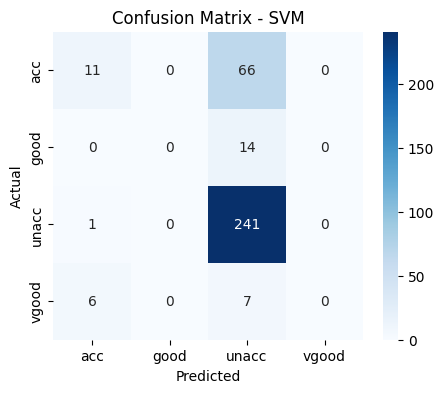


Model: Neural Network
Accuracy: 0.9827
Precision: 0.9829
Recall: 0.9827
F1 Score: 0.9827
Confusion Matrix:
[[ 75   0   1   1]
 [  1  13   0   0]
 [  2   0 240   0]
 [  1   0   0  12]]


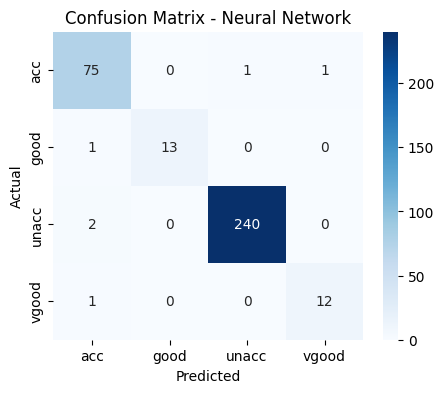


Model: Naive Bayes
Accuracy: 0.6358
Precision: 0.7150
Recall: 0.6358
F1 Score: 0.6199
Confusion Matrix:
[[  5   0  32  40]
 [  2   0   7   5]
 [  2   0 202  38]
 [  0   0   0  13]]


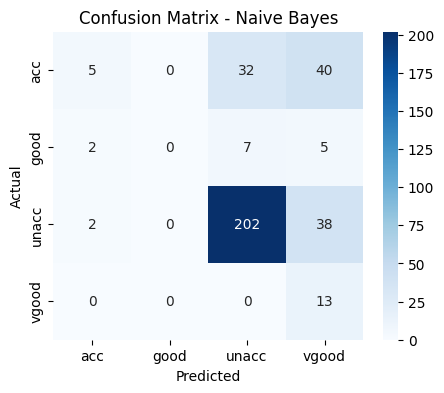


Model: Decision Tree
Accuracy: 0.9855
Precision: 0.9862
Recall: 0.9855
F1 Score: 0.9855
Confusion Matrix:
[[ 76   1   0   0]
 [  0  14   0   0]
 [  2   0 240   0]
 [  2   0   0  11]]


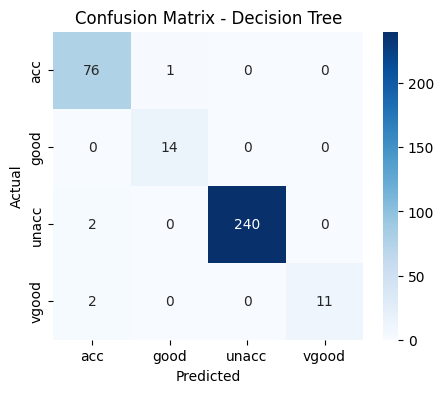


Model: Logistic Regression
Accuracy: 0.6879
Precision: 0.5754
Recall: 0.6879
F1 Score: 0.6093
Confusion Matrix:
[[  5   0  63   9]
 [  1   0  13   0]
 [ 11   0 231   0]
 [  3   0   8   2]]


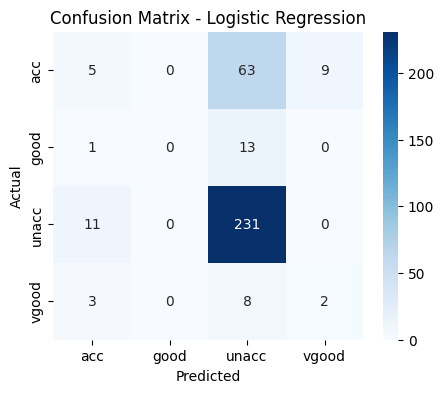

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "car.data"
df = pd.read_csv(file_path, header=None)

# Define column names
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df.columns = columns

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split into features and target
X = df.drop(columns=["class"])
y = df["class"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "accuracy": acc,
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1_score": report["weighted avg"]["f1-score"],
        "conf_matrix": conf_matrix
    }

# Display results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    print("Confusion Matrix:")
    print(metrics["conf_matrix"])

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(metrics["conf_matrix"], annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders["class"].classes_, yticklabels=label_encoders["class"].classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


Sum of Squared Deviations (SSD) for 4 clusters: 7541.3333


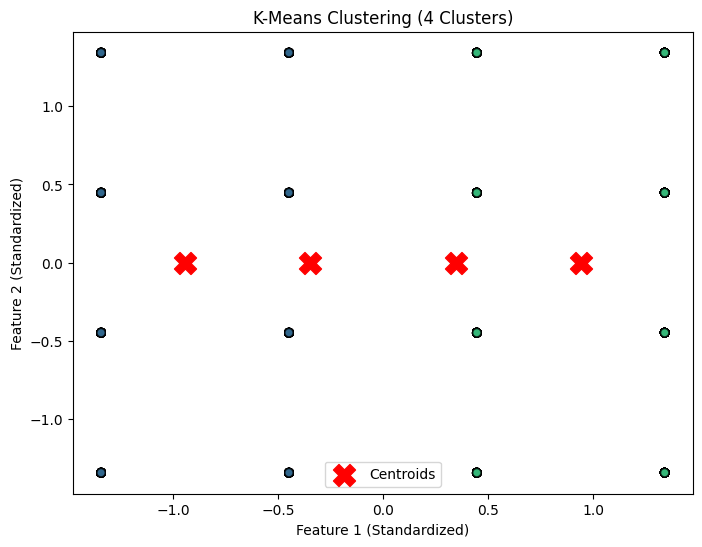

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Load dataset
file_path = "car.data"
df = pd.read_csv(file_path, header=None)

# Define column names
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df.columns = columns

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Extract features for clustering
X = df.drop(columns=["class"])  # Exclude target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Sum of squared deviations (SSD)
ssd = kmeans.inertia_
print(f"Sum of Squared Deviations (SSD) for 4 clusters: {ssd:.4f}")

# Plot cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap="viridis", edgecolor="k", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker="X", c="red", label="Centroids")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("K-Means Clustering (4 Clusters)")
plt.legend()
plt.show()
